In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [18]:
data=pd.read_csv("D:\dinesh document\EXCELR\Data Science\Assingment\Random Forest\Fraud_check.csv")

### EDA

In [78]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [79]:
data.shape

(600, 6)

In [80]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [81]:
data.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.206667,108747.368333,15.558333,0.503333
std,0.500017,0.821958,0.405252,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,0.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,0.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,199778.000000,30.000000,1.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    uint8
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(2), uint8(1)
memory usage: 17.1 KB


In [84]:
data['Taxable.Income'].unique()

array([0, 1], dtype=uint8)

In [85]:
len(data['Taxable.Income'].unique())

2

In [86]:
data['Taxable.Income'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
rk=pd.Series([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501, 97984, 53378, 93458, 56501, 46955, 33492, 35832,
       12470, 53981, 22773, 84691, 50087, 27877, 56647, 59419, 26783,
       79453, 33962, 84429, 63057, 43128, 40220, 79700, 67083, 22054,
       18192, 25222, 58635, 39114, 48738, 28496, 62209, 87677, 93659,
       56503, 27081, 48779, 91304, 49520, 41117, 18199, 76992, 98588,
       20719, 13068, 84835, 44795, 39052, 38704, 98416, 86958, 29222,
       71357, 29543, 23855, 84836, 93307, 64614, 72949, 79211, 28707,
       83229, 73620, 70819, 48313, 37481, 20851, 86079, 10933, 66905,
       36890, 19060, 61906, 31088, 70365, 56536, 16992, 14300, 51914,
       12083, 71376, 99307, 35200, 70812, 62067, 62365, 80618, 52891,
       31409, 81790, 57794, 20604, 83459, 43051, 68911, 38374, 86784,
       42488, 35922, 46610, 28764, 75170, 24370, 84083, 11784, 10003,
       98970, 77735, 46070, 27143, 56974, 99109, 32603, 24215, 33092,
       71297, 68268, 33810, 49995, 11865, 28904, 39144, 31591, 30167,
       72382, 79869, 70526, 38143, 70298, 54747, 92997, 24347, 57445,
       70645, 69540, 70712, 32900, 14326, 43865, 29046, 95088, 38586,
       30468, 42254, 32467, 68404, 58451, 86208, 62426, 63710, 25062,
       56438, 17783, 92426, 64667, 32483, 15673, 77511, 76182, 89831,
       12072, 81231, 48169, 31699, 15710, 31645, 98933, 52912, 68756,
       41087, 46798, 34475, 98334, 10900, 61445, 78796, 62141, 90945,
       88918, 62873, 70949, 31521, 59615, 52111, 34598, 61124, 59689,
       23075, 48192, 77367, 82625, 51802, 78922, 38670, 48392, 47425,
       73906, 94013, 27698, 26793, 67033, 20109, 95185, 27684, 98240,
       18032, 46470, 33301, 62800, 27520, 26094, 13571, 36239, 77082,
       71572, 30495, 49771, 32905, 21337, 16082, 43883, 15491, 48081,
       36317, 15627, 51028, 14422, 45525, 23480, 19184, 80239, 33215,
       65203, 65190, 16320, 21696, 56129, 74971, 33356, 29607, 95319,
       94413, 78963, 66865, 40427, 93733, 63543, 41184, 96652, 56555,
       36457, 26101, 36156, 49958, 68696, 97453, 68533, 96438, 50348,
       85016, 73188, 64225, 64437, 66330, 26372, 30714, 84263, 86531,
       93090, 79373, 17440, 81536, 62494, 37580, 60822, 96032, 91545,
       73313, 54345, 33138, 33579, 83094, 90065, 51913, 81378, 32236,
       97980, 38626, 64230, 38183, 89277, 68269, 58751, 88720, 99311,
       94528, 72268, 79593, 94247, 76700, 12011, 87935, 98720, 38638,
       37857, 15532, 22159, 91547, 98738, 21966, 14398, 18572, 77312,
       42074, 82799, 12659, 19649, 50119, 18888, 83061, 39343, 92007,
       78728, 48640, 92070, 97341, 97493, 78400, 52862, 11804, 10455,
       25766, 58199, 88613, 16690, 71164, 48825, 29236, 59689, 48940,
       64320, 84845, 52663, 17957, 69018, 58496, 99128, 35868, 79478,
       57402, 73795, 58403, 85972, 62998, 32786, 17962, 59440, 94772,
       80083, 81026, 86883, 39444, 35886, 24541, 54502, 17183, 39562,
       70157, 72151, 65170, 67936, 93339, 57365, 56628, 83814, 75324,
       46939, 71428, 23884, 95145, 46002, 20309, 72115, 42769, 91870,
       55308, 60789, 51363, 99239, 19272, 44411, 60915, 98433, 81867,
       43980, 50286, 29385, 47565, 26494, 59243, 91488, 33116, 93364,
       70743, 34007, 26128, 33748, 38896, 40674, 97111, 54850, 32948,
       12682, 12453, 34655, 59351, 29916, 36532, 94583, 92819, 76535,
       91220, 71238, 32356, 89094, 91462, 75585, 31629, 42063, 12810,
       85570, 72026, 90444, 50403, 78867, 95920, 41545, 63912, 92498,
       16316, 68617, 59860, 55981, 34833, 39818, 59227, 44809, 10735,
       50242, 56166, 42483, 70572, 31721, 31085, 84931, 69036, 42679,
       84557, 54126, 87685, 85076, 31633, 43018, 27394, 68152, 84775,
       47364, 76340, 69967, 47334, 98592, 96519])

In [88]:
rk[rk<=30000]=30
rk[rk>30000]=70

In [89]:
data['Taxable.Income']=rk

In [90]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,70,50047,10,1
1,1,0,70,134075,18,1
2,0,1,70,160205,30,1
3,1,2,70,193264,15,1
4,0,1,70,27533,28,0
...,...,...,...,...,...,...
595,1,0,70,39492,7,1
596,1,0,70,55369,2,1
597,0,0,70,154058,0,1
598,1,1,70,180083,17,0


In [116]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

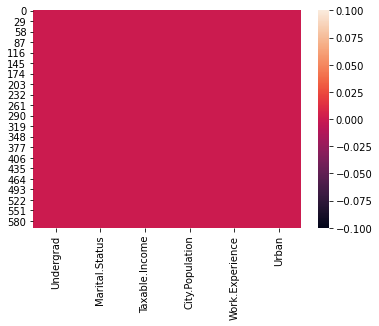

In [115]:
sns.heatmap(data.isnull())

### No missing value and no outlier in dataset

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
oe=LabelEncoder()

In [93]:
data['Undergrad']=oe.fit_transform(data['Undergrad'])
data['Marital.Status']=oe.fit_transform(data['Marital.Status'])
data['Urban']=oe.fit_transform(data['Urban'])

In [94]:
data['Taxable.Income']=pd.get_dummies(data['Taxable.Income'])

In [95]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


## Visualization

array([[<AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Marital.Status'}>],
       [<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'Undergrad'}>],
       [<AxesSubplot:title={'center':'Urban'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>]], dtype=object)

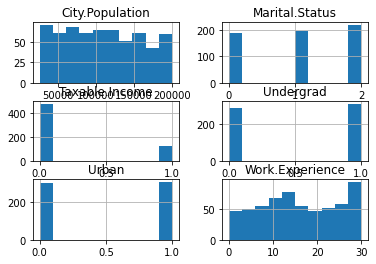

In [110]:
data.hist()

<AxesSubplot:>

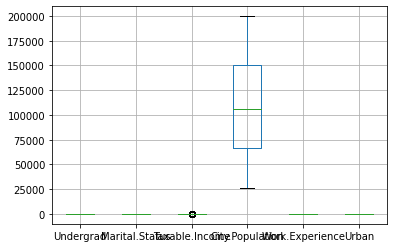

In [111]:
data.boxplot()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City.Population', ylabel='count'>

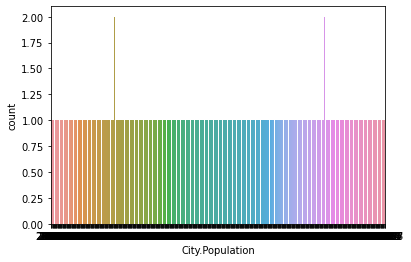

In [97]:
sns.countplot(data['City.Population'])

(array([[600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  58.,  73.,  72.,  72.,  74.,  69.,  63.,  54.,  65.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  19977.8,  39955.6,  59933.4,  79911.2,  99889. ,
        119866.8, 139844.6, 159822.4, 179800.2, 199778. ]),
 <a list of 6 BarContainer objects>)

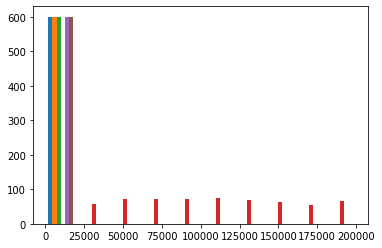

In [96]:
plt.hist(data)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Work.Experience', ylabel='count'>

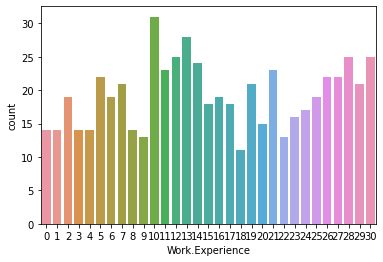

In [98]:
sns.countplot(data['Work.Experience'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

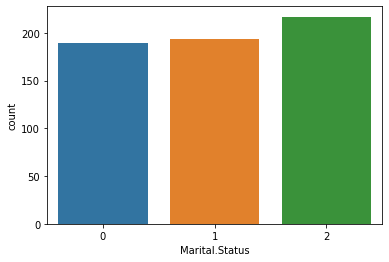

In [99]:
sns.countplot(data['Marital.Status'])

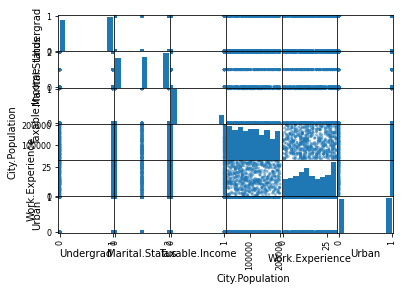

In [112]:
## Scatter plot & corr
pd.plotting.scatter_matrix(data)
plt.show()

In [114]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


## Random Forest Classifier

In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [101]:
x=data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y=data['Taxable.Income']

In [102]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: uint8

In [70]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth=3,random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [105]:
# Predicting the test set results

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=uint8)

In [106]:
from sklearn.metrics import accuracy_score,classification_report

In [107]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.7611111111111111

In [108]:
pd.crosstab(y_pred,y_test)

Taxable.Income,0,1
row_0,,
0,137,43


In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       137
           1       0.00      0.00      0.00        43

    accuracy                           0.76       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.58      0.76      0.66       180



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
